# Homework 5: Decision Tree & Boosting

**Due date**: March 20 , Wednesday by 11:59pm


Both decision tree and the idea of boosting algorithms follows repetitive computations. They are not ideal questions to calculate purely by hand on a realistic scale. But it is also necessary to compute the actual numbers and build trees based on the algorithm to ensure a satisfactory amount of understanding. For question 1, although it follows a traditionally hand-written style, feel free to write some function to compute those formulas that are repetitively called, or anything free you from those numerical burdens. In either case, show all necessary intermediate steps/outputs or reasoning.

## **Question 1:** Build your own decision tree with ID3 (40pts)

To construct a decision tree, a popular heuristic is the ID3 algorithm. ID3 algorithm requires a Gain function  $G(S,i)$ , where $S$ is the set of all training examples, $i$ indicates that we use the $i^{th}$ feature for the current spilt.

For ID3 algorithm, two popular choice for the Gain function are:

1.   Train Error Gain
2.   Information Gain


Consider the table below, which outlines the impact of three key features (program age, availability of extracurricular activities, and learning environment) on student engagement within a specific school program. Each row in the table represents a unique combination of these features and their associated level of student engagement. Our goal is to apply the ID3 algorithm and construct a decision tree. This decision tree will enable us to predict whether a particular type of program is likely to result in high student engagement.

|Data Number || Program Age | Extracurriculars | Learning Environment | Student Engagement |
|------------||-------------|------------------|----------------------|--------------------|
|'1'|| Established | Available        | Traditional          | Low                |
|'2'|| Established | Not Available    | Online               | High               |
|'3'|| Established | Available        | Online               | Low                |
|'4'|| New         | Available        | Traditional          | High               |
|'5'|| New         | Available        | Online               | High               |
|'6'|| New         | Not Available    | Traditional          | High               |



#### 1.a Fill in the table below. Convert the above table to 0 or 1 for each feature attribute (3 pts)


**solution:**

|Date Number|| Program Age($x_1$)           | Extracurriculars($x_2$)                | Learning Environment($x_3$)                    | y                  |
|-----------||-------------|------------------|----------------------|--------------------|
|'1'||             |                  |                      |                    |
|'2'||             |                  |                      |                    |
|'3'||             |                  |                      |                    |
|'4'||             |                  |                      |                    |
|'5'||             |                  |                      |                    |
|'6'||             |                  |                      |                    |




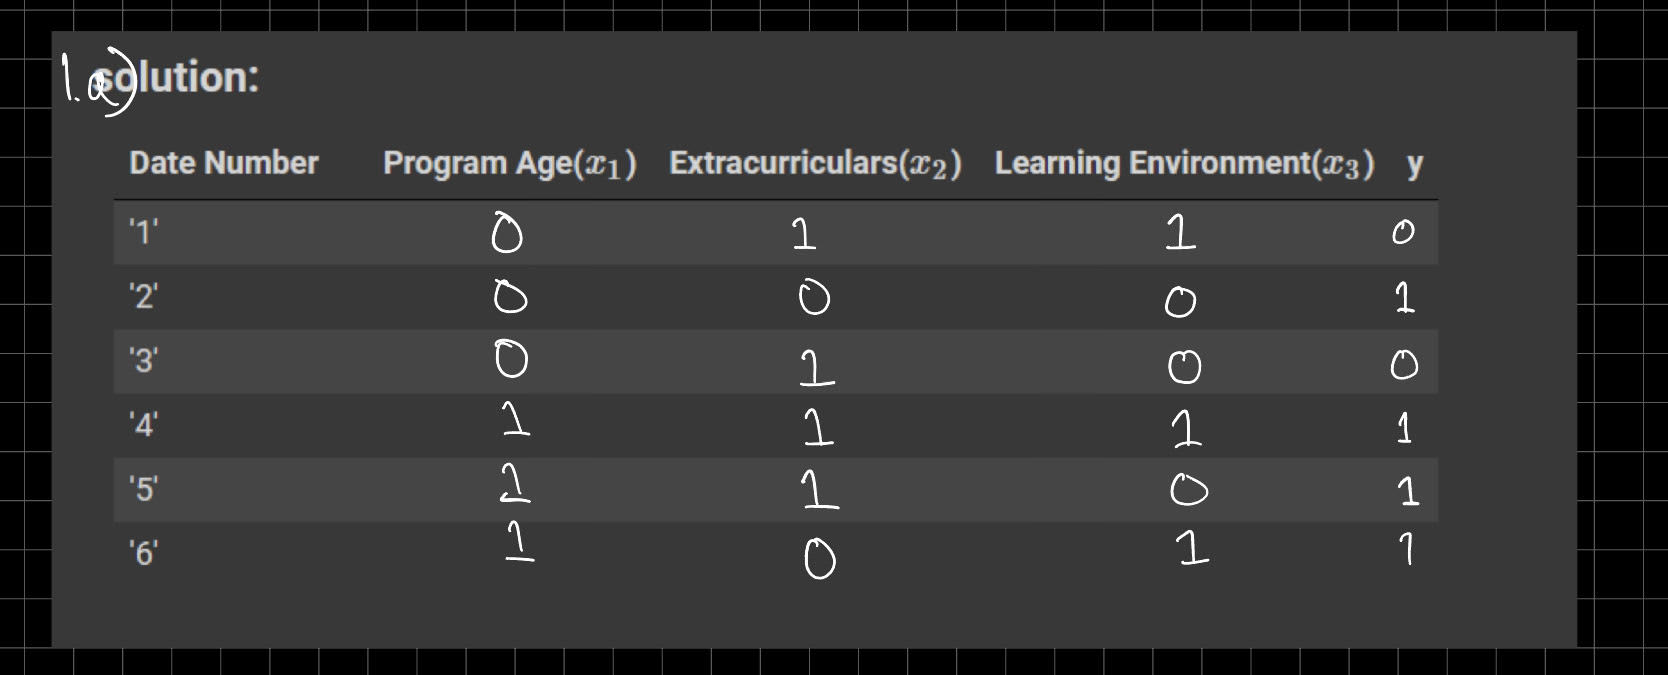

#### 1.b Choosing first feature to split data (10 pts)

For now, $S$ is all data points in our dataset $S$ = {'1', '2', '3', '4', '5', '6'}. Compute $G$($S$, Program Age), $G$($S$, Extracurricular), and $G$($S$, Learning Environment) using the **training error gain**. Which feature will you choose to do your first split?



**solution:**


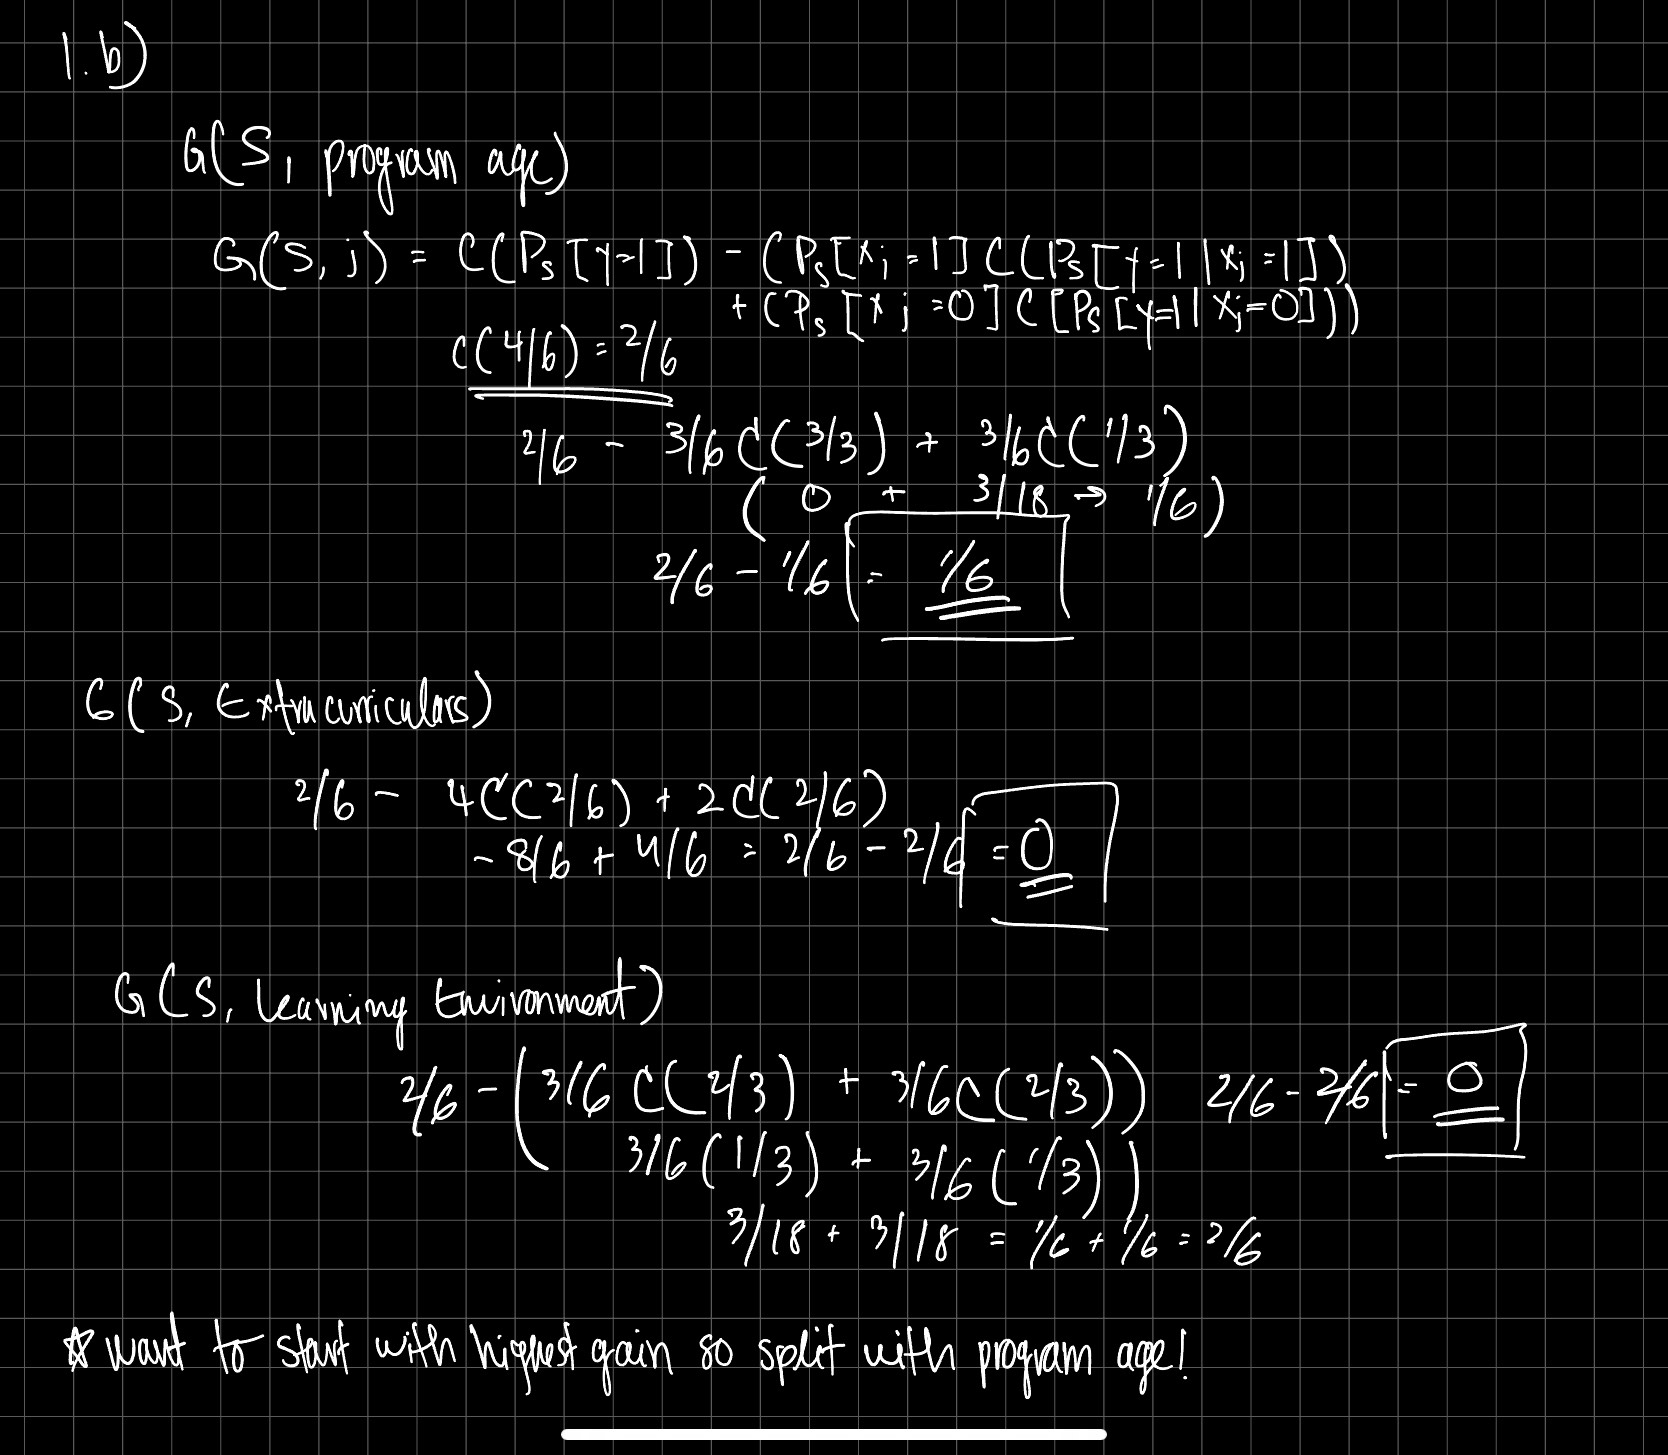


####1.c Now compute using **information gain**. You may assume $\log$ is base $2$ and $0 \cdot \log 0 = 0$ (12 pts)

Consider the impact of choosing information gain over training error gain when selecting the preferred feature to do our first split. Does it change the preferred feature to split? Explain your reasoning. Please free to use graphs and/or recalculate the gains to support your answer.

**solution:**


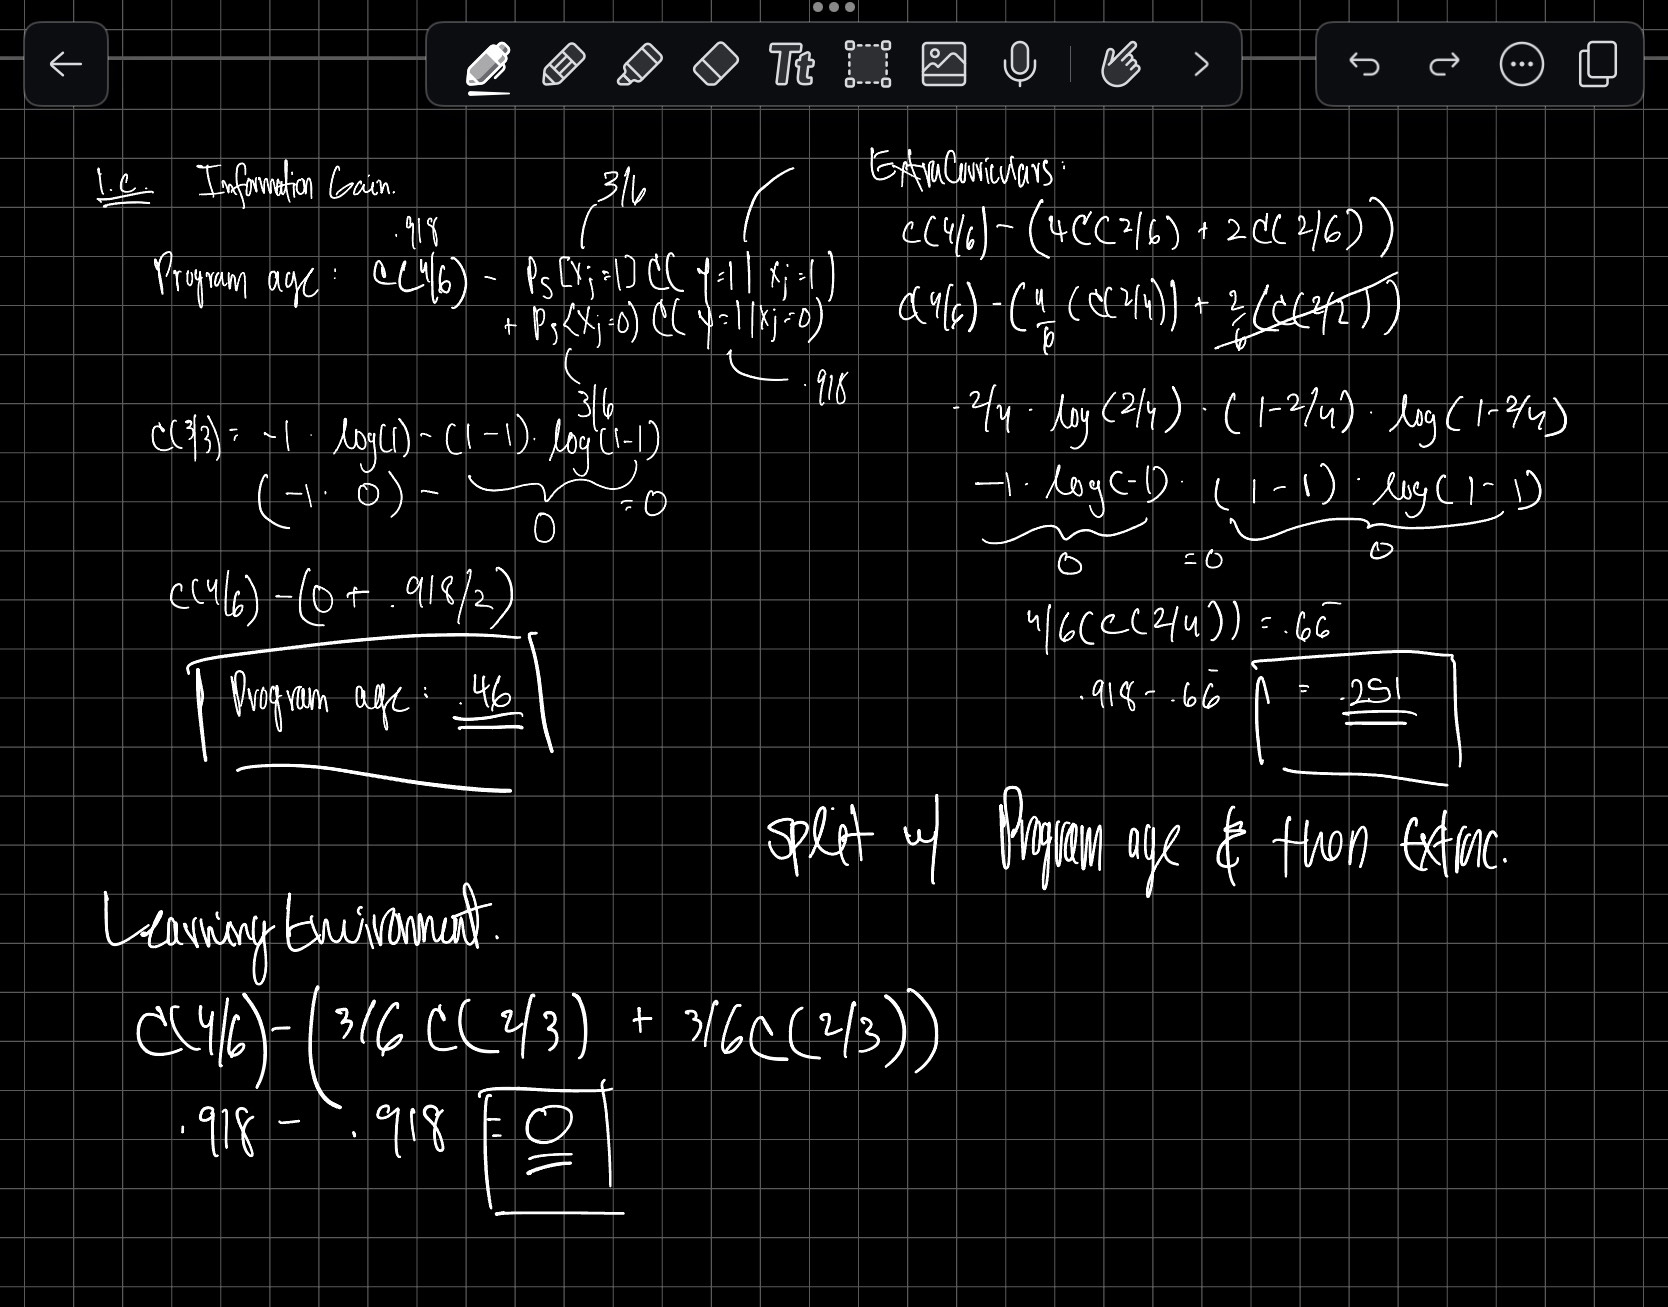



#### 1.d Continoue the ID3 procedure using **train error gain** to finish building your full decision tree. **SHOW YOUR WORK!** (15 pts)

For each node in the decision tree, specify your set $S =$ {...} , which represents the subset of training examples that are yet to be split, and identify your set $F =${...}, which denotes the remaining features available to split the data. On the line that connects a parent node to a child node, label it with $x_f = 0$ or $x_f = 1$, where $f$ represents the index of the feature being used to perform the split.

Here is an image of what's described in the above text. Note that this is not the full tree.

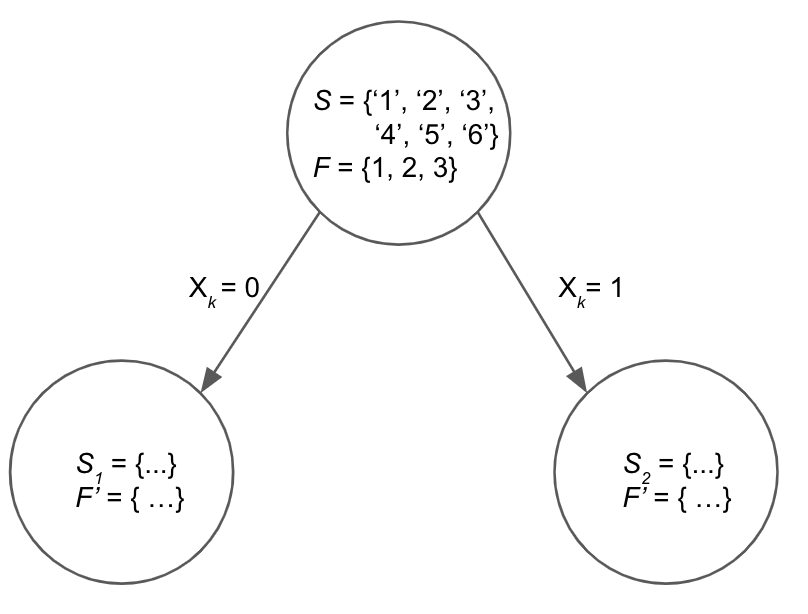

**solution:**


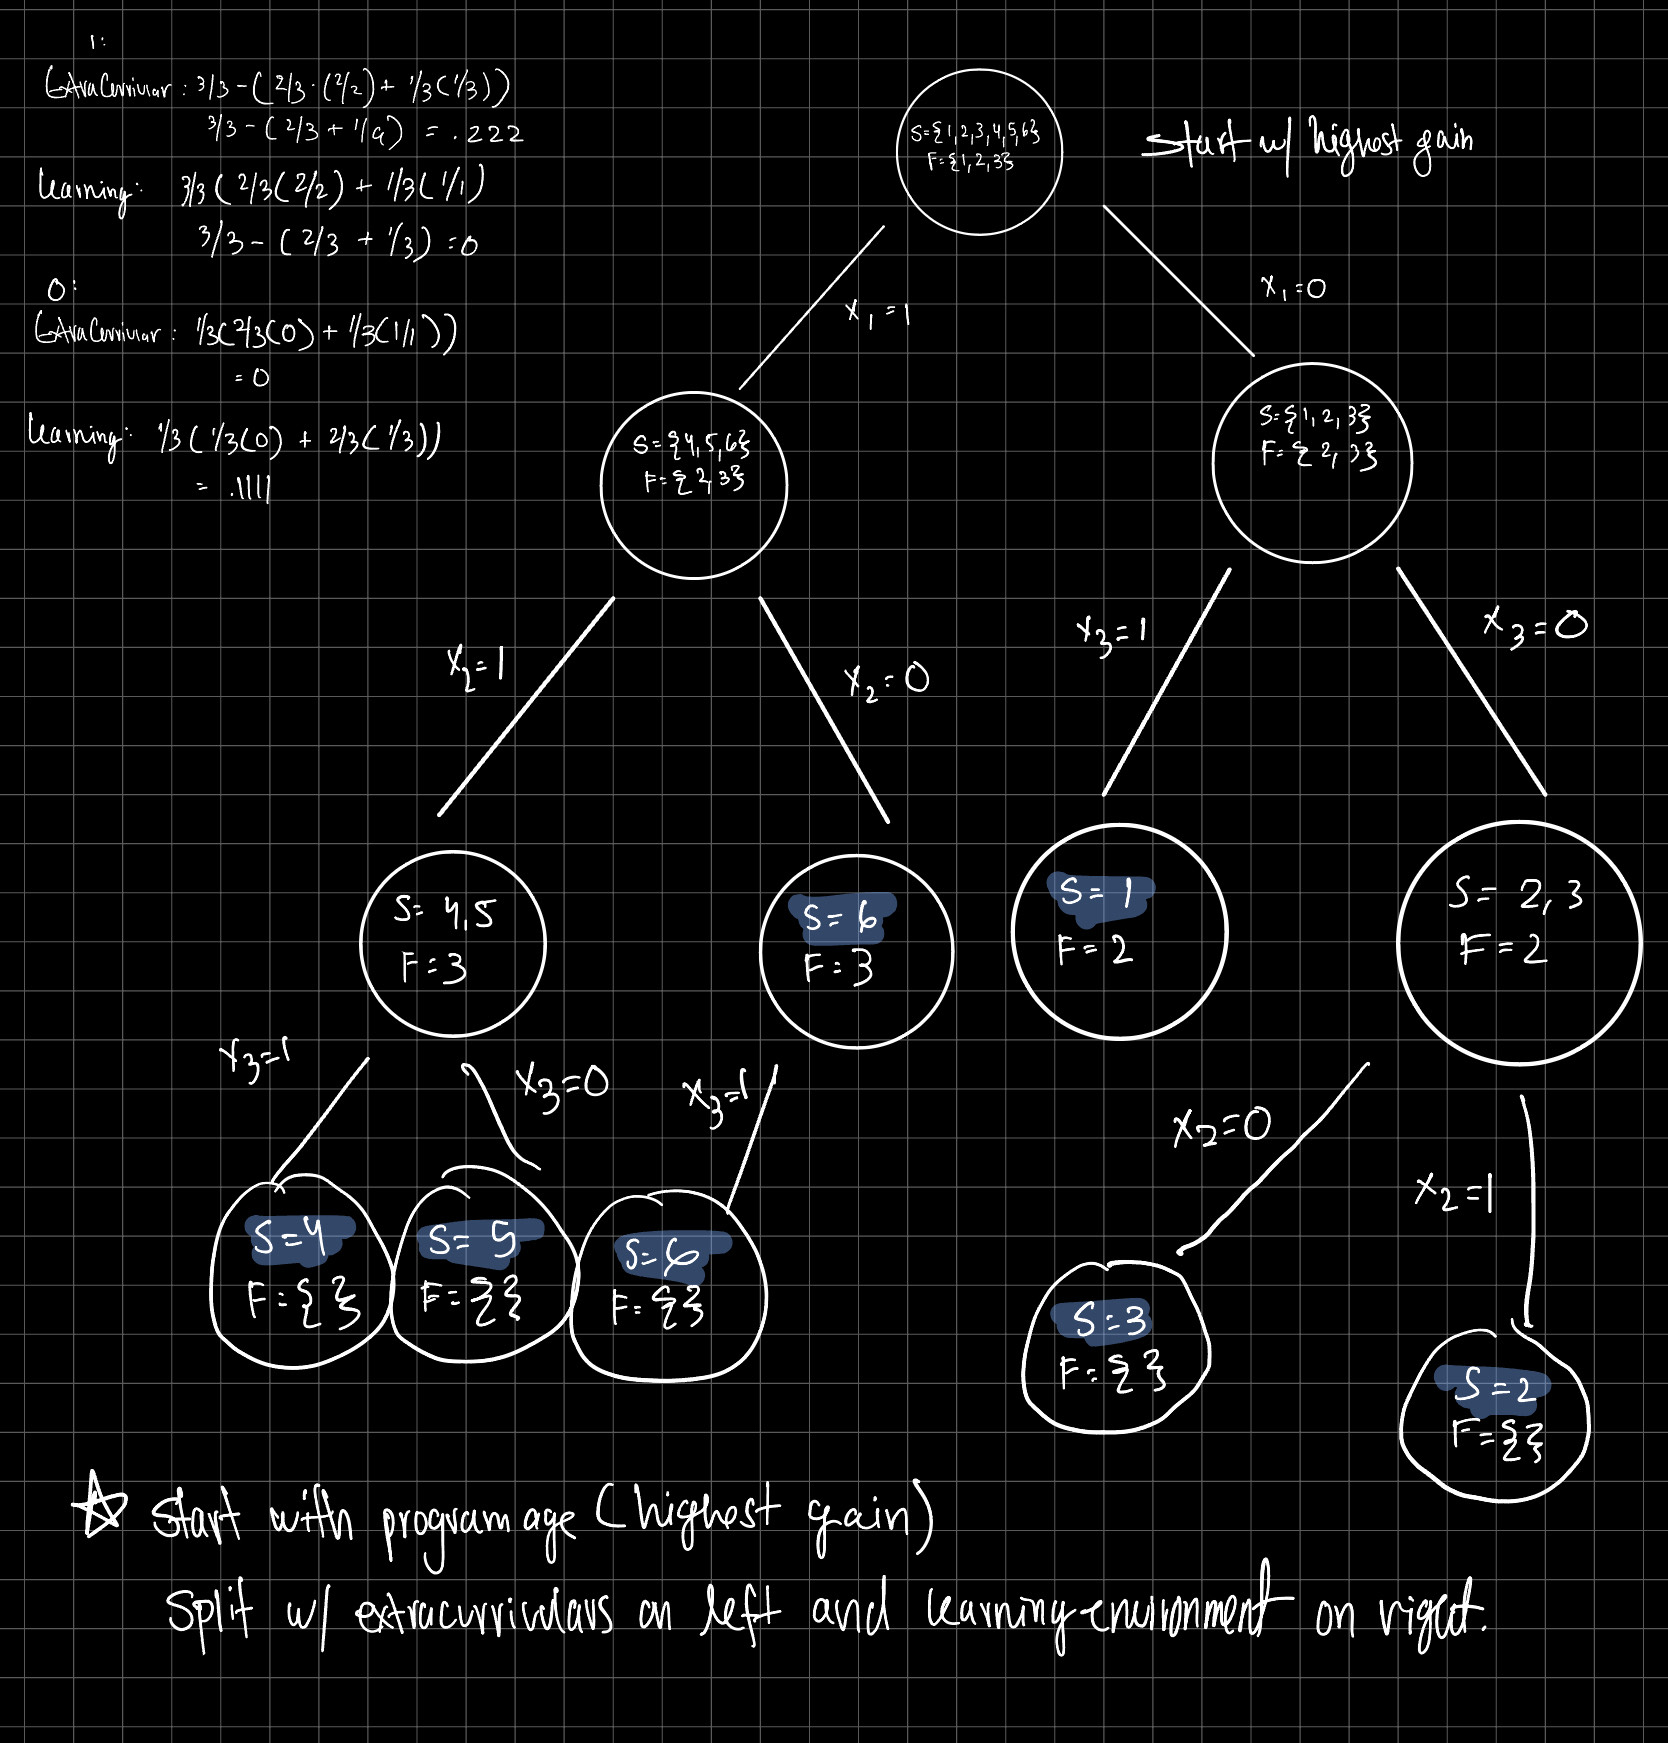



## **Question 2:** Decision Tree: real-valued features and labels (15pts)

Decision tree can also be applied to real-valued features. For instance, we can train a decision tree to predict real valued temperature given some real-valued features, such as readings from humidity, wind speed, etc.

This is achieved by an indicator function $\mathbb{1}_{ \{  TRUE \} } = 1, \mathbb{1}_{ \{  FALSE \} } = 0$. If we have a whether dataset (wind, temperature) as following:

| Data Number |  1 | 2 |3 | 4| 5| 6| 7| 8| 9|
| --- | --- | --- | | | | | | | |
| Wind (mph) | 22 | 13 |  13 | 19 | 12 | 11| 9| 7 |15 |
| Temperature (∘F)| 43 | 48 | 41 | 39 | 65 | 50 | 68 | 70 | 45|

A possible decision to predict temperature based on wind speed is to test whether wind speed is less than some threshold. For example, we can make split by querying $\mathbb{1}_{ \{ \text{wind} < 13 \} }$. The resultant split is:




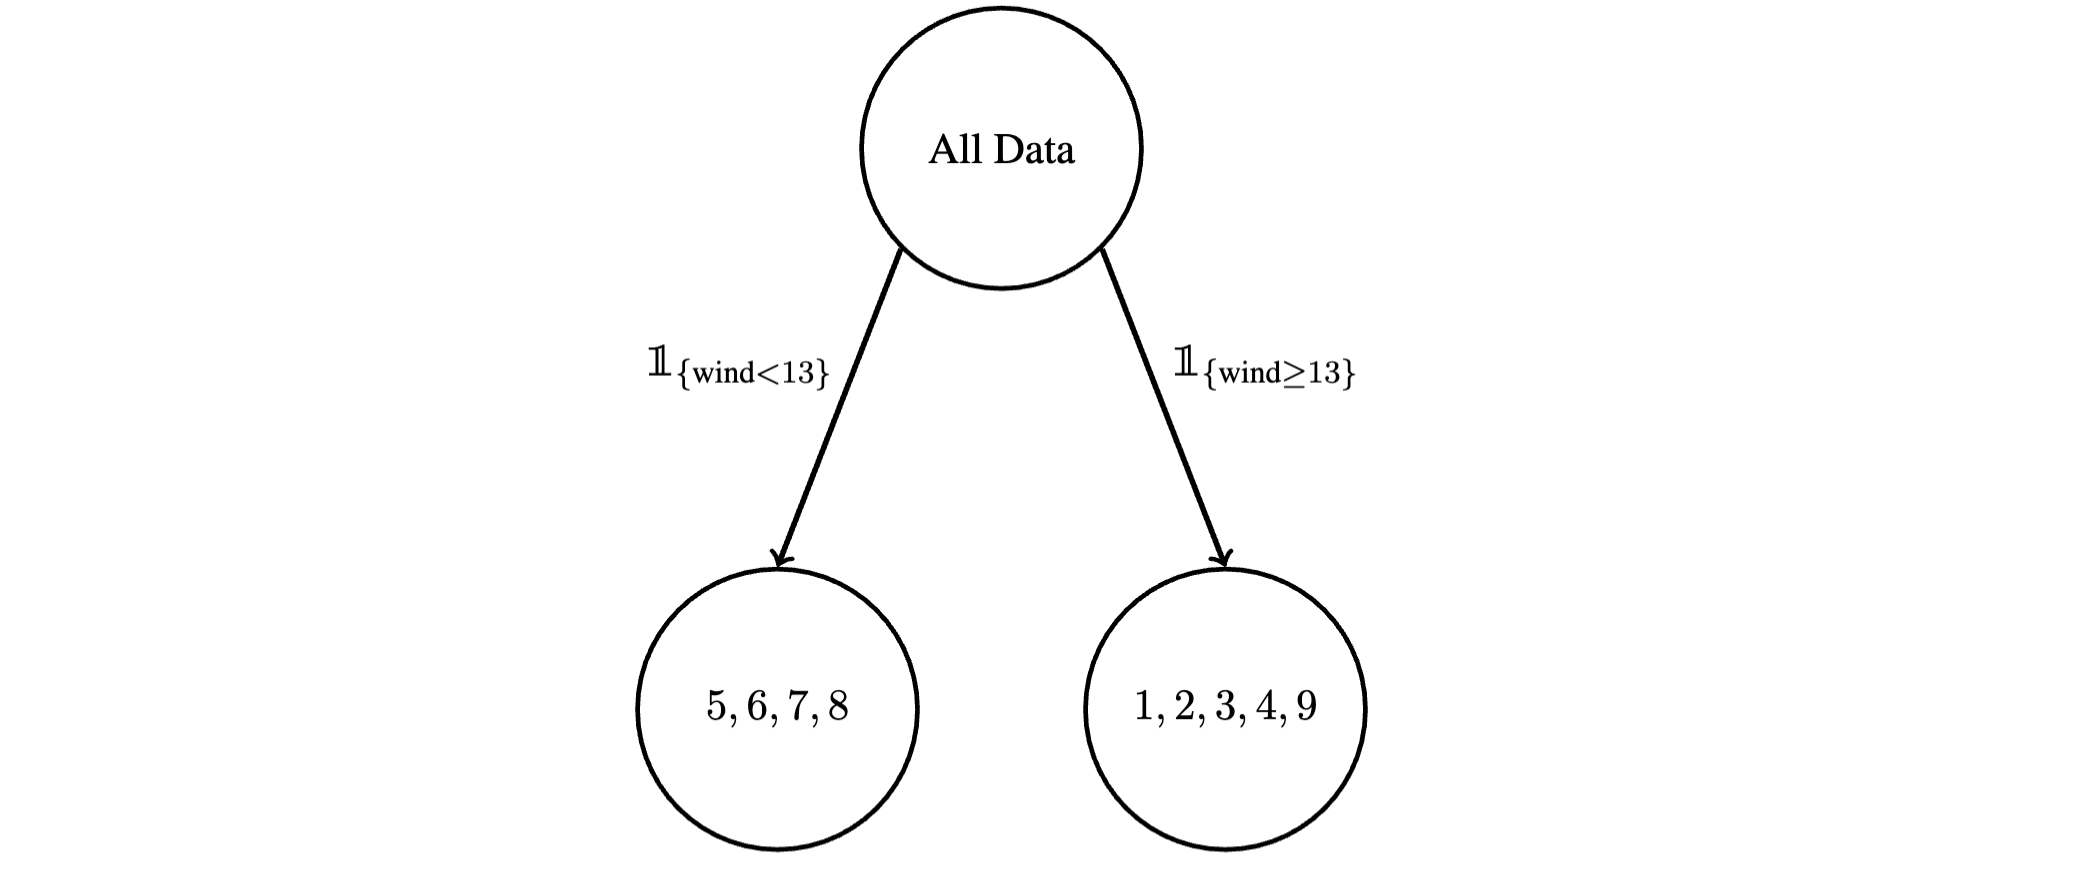

In this way, we construct yes/no questions with real-valued inputs (is the feature greater than the threshold?) and use the answers to these questions to build the decision tree.

The diagram above shows a trained decision tree with training data (actually it is a trained decision *stump*). Since we wish to predict a real number rather than make a binary classification, the prediction is made by the *average *label of a leaf rather than the most common label of the leaf. So the left leaf make prediction of temperature $(65+50+68+70) / 4 = 63.23$. The right leaf make prediction in the similar way yield to 43.2. For example, if a testing data is fed to the train with wind speed $16$ mph, the predicted temperature is 43.2.


Now, suppose we have a set of (Data, Label) $S = \{ (1,2), (2,-2), (3, 1)\} $, that is we have 3 data points where the feature vectors $x$ have dimension 1. We wan to train a decision tree to predict labels. We need to make splits according to a modified ID3 Algorithm, where we measure loss using the squared error rather than the 0-1 classification loss. For the first split, the modified algorithm is:

1.   Pick a set of thresholds $\theta_1, \cdots, \theta_M$. For each threshold $\theta_m$, make a split based on $\mathbb{1}_{\{ x < \theta_m \}}$
2.   For each $m = 1, \cdots, M$: denote a set $S_{1,m} = \{x_i : \mathbb{1}_{\{ x_i < \theta_m \}} \} $ and $S_{2,m} = \{x_i : \mathbb{1}_{\{ x_i \ge \theta_m \}} \} $
3.   For each $m = 1, \cdots, M$: Compute group average $\mu_{1,m}$ as the average of data points in $S_{1,m}$, similarly compute group average $\mu_{2,m}$ by using $S_{2,m}$
4.   For each $m = 1, \cdots, M$: Compute (mean squared) loss for making a split at $\theta_m$: $$L(S,m) = \frac{1}{|S|} \left(\sum_{x_i \in S_{1,m} } (y_i - \mu_{1,m})^2  + \sum_{x_j \in S_{2,m} } (y_j - \mu_{2,m})^2 \right)$$
5. Define $\mu$ to be the average label in the set $S$: $\mu=\frac{1}{|S|}\sum_{S} y_i$ and define the train error gain function: $$G(S,m) = \frac{1}{|S|}\sum_{x_i\in S} (y_i-\mu)^2 - L(S,m)$$.
5. Pick the splitting index for $\theta$ by $m^{\ast} = \underset{m}{\operatorname{argmax}} G(S,m)$


#### 2.a Candidate Thresholds (5pts)

Although our feature is real-valued, from the algorithm displayed above, there are finite number of effective splits we need to consider in the context of our training set $S = \{ (1,2), (2,-2), (3, 1)\} $. Given this training set, if we make one split:

1.   What is a minimum (but sufficient) number for $M$.
2.   What values of $\theta_1, \cdots, \theta_M$ might you consider?

Note: the solution (to part 2) is not unique here, and you should not need  any extensive calculuations.



**solution:**


1: Minimum M = 2 

2: 1.5, 2.5


#### 2.b Full Decision Tree (10pts)

A Full Decision Tree is one in which we constantly make splits until each leaf node contains data with one unique label.

1.   What is the training loss for a full decision tree?
2.   Is a full decision tree a high bias or a high variance model?
3.   If we need to train a decision tree on a bigger dataset, what would you do to combat the issue identified above?

**solution:**


1: Training loss is 0.


2: High variance.


3: Prune the tree, or cross validate.



## **Question 3:** Boosting (45pts)


#### 3.a Data and helper functions (5pts)

This section provides 2D training data `X` and it's label `y`. We also provide a plot function `plot_adaboost()` to visualize training data with positive class plotted in blue and negative class plotted in red when first two attribute are provided. If extra attributes are provided:


*   `P`: as weights of training data, then weights will be reflected as the relative size of the data being plotted
*   `WL`: is a trained weak model instance (decision stump in question 2.2), then decision boundary will be plotted


In [261]:
### Do not change anything. Just run it!

import numpy as np
import matplotlib.pyplot as plt

def plot_adaboost(X, y, P = None, WL = None):
    ''' A function to plot data when first two attribute are provided, when the
        later attribute are also provided, the decision boundary and weight of
        each data will also be visulized

        arguments:
          X: the entire data set in matrix form
          y: the corresponding labels
          P: distribution (weight) for each data, default as uniform
          WL: a trained instance of weak model
    '''

    # default equal weight
    if P is None:
       P = np.ones(X.shape[0]) / X.shape[0]
    # rescale for visulization:
    P = P * 500

    # initialize a graph:
    fig, ax = plt.subplots(1, 1, figsize=(3, 3))

    # scatter data based on positive/negative class
    ax.scatter(X[y == 1][:,0], X[y == 1][:,1], s = P[y == 1], marker='.', color='b')
    ax.scatter(X[y == -1][:,0], X[y == -1][:,1], s = P[y == -1], marker='+', color='r')

    # set the boundary of the graph
    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    # if WL is provided we can also visulize the decision boundary for the current step
    if WL is not None:
        if WL.b == 1:
            col = ['b', 'r']
        else:
            col = ['r', 'b']
        if WL.j == 0:
            x = [x_min, x_min, WL.theta, WL.theta]
            y = [y_min, y_max, y_max, y_min]
            ax.fill(x,y, col[0], alpha = 0.2)

            x = [WL.theta, WL.theta, x_max, x_max]
            ax.fill(x,y, col[1], alpha = 0.2)

        else:
            x = [x_min, x_max, x_max, x_min]
            y = [y_min, y_min, WL.theta, WL.theta]
            ax.fill(x,y, col[0], alpha = 0.2)

            y = [WL.theta, WL.theta, y_max, y_max]
            ax.fill(x,y, col[1], alpha = 0.2)


    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

# Given data with 2 features:
X = np.array(
       [[-0.08,  0.12],
       [ 1.54,  0.29],
       [-0.54,  0.61],
       [-1.06, -0.45],
       [ 1.43,  0.35],
       [-0.02, -0.92],
       [-1.1 , -1.02],
       [ 0.84, -0.79],
       [-0.63, -0.86],
       [-0.37,  0.33]])
y = np.array([-1,  1, -1,  1,  1, -1,  1,  1, -1, -1])

Call `plot_adaboost()` to generate a plots when all data within `X` are equally weighted.


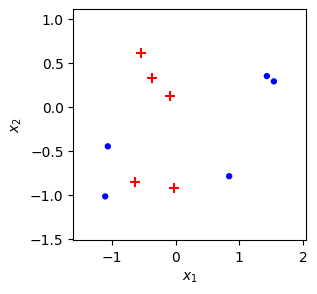

In [262]:
### --- Add your code here---
plot_adaboost(X, y)

Fill in the function `create_P_5` that creates an array that's same shape as `y`. It should create a normalized array where negative data where `y = -1` to weight five times as much as the positive ones.

In [263]:
import numpy as np

def create_P_5(y):
    """
    Create a normalized array P based on the input array y.
    Elements in P will make the corresponding to elements in y that are -1 to
    be weighted five times as much as those with y = +1

    Parameters:
    y: the label where the element value is 1 or -1

    Returns:
    P: a normalized array P
    """
    weights = np.where(y == -1, 5, 1)  
    P = weights / np.sum(weights)  
    print(P)
    return P


P = create_P_5(y)

[0.16666667 0.03333333 0.16666667 0.03333333 0.03333333 0.16666667
 0.03333333 0.03333333 0.16666667 0.16666667]


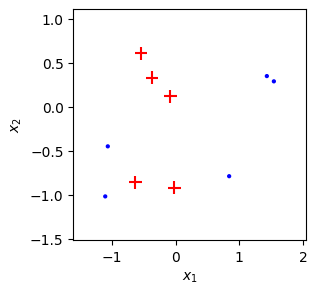

In [264]:
# Run this and observe if data with y = -1 are five times bigger
plot_adaboost(X, y, P)

#### 3.b Decision Stump as a Weak Learner (15pts)

The decision stump is exactly a decision tree with 1 split for real valued feature attributes. Mathematically, a decision stump for features $\mathbf{x} \in \mathbb{R}^d$ is the Hypothesis class:

\begin{align*}
\mathcal{H} = \left\{ \mathbf{x} \mapsto \text{sign} (\theta - x_j ) \cdot b : \theta \in \mathbb{R}, j \in [d], b\in \{ -1, +1\} \right\}
\end{align*}

where $x_j$ is the $j^{th}$ feature of $\mathbf{x}$. Decision stump can be used as a weak model as part of AdaBoost algorithm. In the context of AdaBoost, we train the weak model (decision stump) by minimize a risk function with respect to some distribution $P \in \mathbb{R}^n$ over training set $S = \{(\mathbf{x}_1, y_1), \cdots, (\mathbf{x}_n, y_n) \}$:

\begin{align*}
h^{\ast} = \underset{h \in \mathcal{H}}{\operatorname{argmin}} L_P(S) = \underset{h \in \mathcal{H}}{\operatorname{argmin}} \sum_{i=1}^{n} p_i \mathbb{1}_{\{ h(\mathbf{x}_i) \ne y_i \} }
\end{align*}

where $p_i$ is the $i^{th}$ element of $P$, it is also the weight for data $(\mathbf{x}_i, y_i)$. Essentially, we are finding the optimal model parameter $\theta^{\ast}, j^{\ast}, b^{\ast}$ that minimizes $L_P(S)$ and satisfies constraints specified in the hypothesis class $\mathcal{H}$, and the final model will make prediction by
\begin{align*}
\hat{y} = \text{sign}(\theta^{\ast} - x_{j^{\ast}}) \cdot b^{\ast}
\end{align*}

There are heuristics to solve the minimization problem, which is given below. The following coding cell can be viewed as a miniature of a model you call from sklearn. Your task here is to

1.   understand the syntax of a class object in Python, which will also be useful in the later of the course for coding a neural network.
2.   **complete the `predict()` method for a decision stump.**

You don't need to understand exactly how the training algorithm goes. If you are interested, the `fit()` method is an implementation of section 10.1.1 of [Understanding Machine Learning from Shai Shalev-Shwartz and Shai Ben-David](https://www.cs.huji.ac.il/~shais/UnderstandingMachineLearning/understanding-machine-learning-theory-algorithms.pdf), which is a recommended reading from the course reading list.


In [265]:
class Weak_Learner:
    '''
    A class to compute the optimal decision stump.

    attributes:
      j: int (which feature to split on)
      theta: float (splitting threshold)
      b: int (+/- 1, label for the high split value - the low split value's
        label will be -b)
    '''

    # constructor
    def __init__(self):
        self.j = None
        self.theta = None
        self.b = None

    # fit method
    def fit(self, X, y, P = None):
        '''

        arguments:
          X: the entire data set in matrix form
          y: the corresponding labels
          P: distribution for each data

        no return value (instead, this function modifies the internal
        state of the class)
        '''
        # initialize current optimal:
        F_star = np.inf

        if P is None:
          P = np.ones(X.shape[0]) / X.shape[0]

        # loop over dimension:
        for j in range(X.shape[1]):

            # sort data using the j^th feature:
            indices = np.argsort(X[:,j])
            x_sorted = X[indices,j]
            y_sorted = y[indices]
            P_sorted = P[indices]

            # append extra element for x_sorted
            x_sorted = np.append(x_sorted, [x_sorted[-1]+1])
            # compute spliting position
            splits = (x_sorted[:-1] + x_sorted[1:]) * 1/2
            splits = np.append([x_sorted[0]-1], splits)

            # current objective:
            F_pos = P_sorted[y_sorted == 1].sum()
            F_neg = P_sorted[y_sorted == -1].sum()

            # if slipt, objective changes:
            delta = y_sorted * P_sorted
            delta = np.append([0], delta)

            # compute objective function values for each splits
            F_pos_val = F_pos - np.cumsum(delta)
            F_neg_val = F_neg + np.cumsum(delta)

            # check the optimal splits and b:
            pos_min = F_pos_val.min()
            pos_indx = F_pos_val.argmin()
            neg_min = F_neg_val.min()
            neg_indx = F_neg_val.argmin()

            if (pos_min < F_star) or (neg_min < F_star):
                if pos_min <= neg_min:
                    self.b = 1
                    self.theta = splits[pos_indx]
                    self.j = j
                    F_star = pos_min
                else:
                    self.b = -1
                    self.theta = splits[neg_indx]
                    self.j = j
                    F_star = neg_min


    # predict method:
    def predict(self, X):
        pred = np.sign(self.theta - X[:, self.j]) * self.b
        return pred
       


Complet the `train_and_predict()` function below.

In [266]:
def train_and_predict(X, y):
    """
    This function should initialize a Weak_Learner, fits it to the provided
    training data, and output the trained Weak_Learner and the pred on the same data.

    Parameters:
    X: feature dataset used for training the Weak_Learner
    y: labels corresponding to the feature dataset

    Returns: a tuple containing:
      WL: trained Weak_Learner
      pred: Predicted labels for the input feature dataset using the trained Weak_Learner
    """
    ### --- Add your code here ---
    WL = Weak_Learner()
    WL.fit(X,y)
    pred = WL.predict(X)

    return WL, pred

WL, pred = train_and_predict(X, y)

Complet the `evaluate _and_plot()`function below.

[-1.  1. -1. -1.  1. -1. -1.  1. -1. -1.]
[-1  1 -1  1  1 -1  1  1 -1 -1]
Number of wrong pred: 2


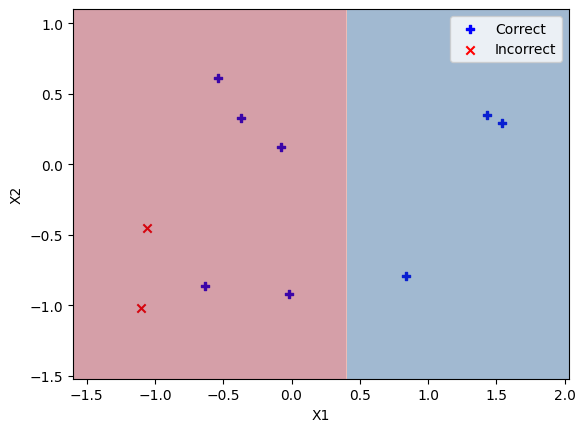

In [273]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_and_plot(pred, y, X, WL):
    """
    This function will compute the number of incorrectly classified points,
    print it as string, and plot the training data along with the decision boundary from the trained Weak Learner.

    Parameters:
    pred: predicted labels from the model
    y: true labels for the data
    WL: trained Weak_Learner
    X: training data

    Returns: none
    """
    print(pred)
    print(y)
    print("Number of wrong pred: " + str(np.sum(y!=pred)))

    plt.figure()
    plt.set_cmap(cmap="RdBu")
    plt.scatter(X[y==pred, 0], X[y==pred, 1], c='blue', marker="P", label='Correct')
    plt.scatter(X[y!=pred, 0], X[y!=pred, 1], c='red', marker = "x",  label='Incorrect')
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() +.5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() +.5
    x2, y2 = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = WL.predict(np.c_[x2.ravel(), y2.ravel()])
    Z = Z.reshape(x2.shape)
    plt.contourf(x2, y2, Z, alpha=0.4)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()


evaluate_and_plot(pred, y, X, WL)


#### 3.c Pieces for AdaBoost (6pts)

Complete the following functions to compute quantities required by the AdaBoost algorithm. Specifically, if we are in iteration $t$, we require three functions:


1.   `weights_on_example()`: this should compute $P_{t}$
2.   `error_weighted()`: this should compute  $\epsilon_t$
3.   `weight_on_classifier()`: this should compute  $\eta_t$




In [268]:
import numpy as np

def weights_on_example(F, y):
    '''
    computes the weights P

    arguments:
      F: numpy array containing predictions of the current
         classifier on the training set. F[i] should be the predicted
         label for example i.
      y: numpy array containing the labels on the training set.

    returns:
      P: numpy array containing the weights for training the next weak model.
    '''
    w = (F != y).astype(float)
    X = np.sum(w)
    P = w / X
    return P

def error_weighted(pred, y, P):
    '''
    computes weighted error of a hypothesis/classifier returned by a weak model.

    arguments:
      pred: numpy array containing predictions of the hypothesis
      y: numpy array containing labels on the training set.
      P: weights

    returns:
      epsilon: float value equal to the weighted training error.
    '''
    w = (pred != y).astype(float)
    X = np.sum(w * P)
    return X

def scale_on_classifier(epsilon):
    '''
    computes scale factor for a classifier returned by a weak model.

    arguments:
      epsilon: float value giving the weighted training error.

    returns:
      eta: float value giving the scale to multiply this classifier by in AdaBoost.
    '''
    eta = 0.5 * np.log((1 - epsilon) / epsilon)
    return eta


#### 3.d AdaBoost (15pts)

Complete `train()` which resemble the AdaBoost algorithm using functions from previous questions.

Your function should also store some intermediate values for later questions as well as accomplish a visualization task as specified in the function description.



In [269]:
def train(X, y, T):
    '''
    A function resembles AdaBoost. And at each iteration t:
    plot weighted training data (P_t) and decision boundary produced
    by weak learner instances

    arguments:
      X: the entire data set in matrix form
      y: the corresponding labels
      T: number of total iterations

    returns:
      F: numpy array containing prediction of the AdaBoost algorithm at the end of iteration T (sign(F_{T+1}) in class)
      Models: a length T List of trained Weak_Learner instances for each iteration t
      etas: a numpy array of scaling for each iterationclassifier: eta_t) for each iteration t
        That is, F[i] = sign(sum_t=1^T weights[t] pred[t][i])
        where pred[t] is the list of predictions of Models[t] on the training set.

    '''
    ### --- Add your code here---

    n_samples, n_features = X.shape
    weights = weights_on_example(n_samples, y)
    Models = [] 
    etas = np.zeros(T)  

    for t in range(T):
        wl = Weak_Learner() 
        wl.fit(X, y, weights)  
        Models.append(wl)

        model = wl.predict(X)  
        w_error = error_weighted(model, y, weights)

        eta = scale_on_classifier(w_error)
        etas[t] = eta
        #BOOST
        exponents = -eta * y * model
        weights *= np.exp(exponents)
        weights /= np.sum(weights)  

    pred = np.array([learner.predict(X) for learner in Models])
    F = np.sign(np.sum(etas * pred, axis=0))

    return F, Models, etas


Call `train()` with `T = 10`. Store the returned values in new variables F, models, etas.

In [270]:
### --- Add your code here ---

F, models, etas = train(X,y,10)


In [271]:
# Observe the training error

#Do not change anything. Just run it!
train_error = 1-(F==y).sum()/len(y)
print('training error: ', train_error )

training error:  0.0


Based on above plots, you should be able to observe if a data is not classified correctly at current iteration. The size of the data points increases for the next round. This means we elevate the weight for wrongly classified examples and will put more effort to make it correct at next iteration.


#### 3.e Decision Boundary (4pts)

The AdaBoost uses a linear combination of weak models as its prediction. The easiest way to visualize the decision boundary of AdaBoost is to simulate it: that is to create a dense mesh grid and make the model make predictions. If you stored and implemented everything correctly, running the following code should allow you to visualize the decision boundary of AdaBoost.

Note: There is no code required for this question, you are only required to run the code. **Credit is assigned for completeness.**

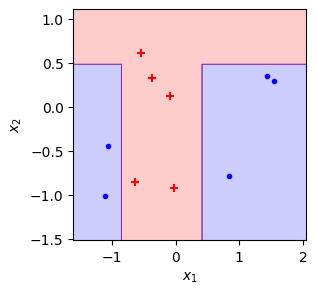

In [272]:
# Do not change anything. Just run it!
def plot_staged_db(X, y, models, etas):
    pad = 1
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    ax.scatter(X[y == 1][:,0], X[y == 1][:,1],  marker='.', color='b')
    ax.scatter(X[y == -1][:,0], X[y == -1][:,1],  marker='+', color='r')

    plot_step = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    # reshape to the shape of n by 2:
    grid = np.hstack((xx.reshape(-1,1), yy.reshape(-1,1)))

    F = 0
    for h, eta in zip(models, etas):
        pred = eta * h.predict(grid)
        pred = pred.reshape(xx.shape)
        F += pred

    F = np.sign(F)

    ax.contourf(xx, yy, F, colors=['r', 'b'], alpha=0.2)

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

plot_staged_db(X, y, models, etas)